## Metrics: hybrid + multiple output models

Lets get the overall metrics for all models in one place, and visualise forecasts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def load_metrics_npy(filepath):
    val_metrics_list  = np.load(filepath, allow_pickle=True).tolist()
    training_dfs=[]
    val_dfs=[]



    for i in val_metrics_list:
        val_dfs.append(pd.DataFrame(i,columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])) 
        
    param_list = []
    for month in [0, 1, 2, 3, 4]:
        param_list.append('month' +str(month))
    training_dict = dict(zip(param_list, training_dfs))
    val_dict = dict(zip(param_list, val_dfs))
    months_averaged = sum(val_dict.values())/5
    
    val_dict_avg=[]
    for key in val_dict:
        val_dict_avg.append((val_dict[key].mean()))
    lookahead_avgs = dict(zip(param_list, val_dict_avg))
    return  months_averaged, lookahead_avgs, val_metrics_list

## Hybrid Metrics

In [32]:
df=pd.DataFrame(np.load('Hybrid Univarite3/val_metric_dict_1.npy', allow_pickle=True).reshape(50,5),columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])
hybrid_lookaheads_metrics=[]
for i in range(0,10):
    hybrid_lookaheads_metrics.append(df.iloc[i::10, :].mean())

In [33]:
sum(hybrid_lookaheads_metrics)/10

RMSE     26.082692
MSE     852.171591
MAE      13.094625
MAPE      0.171413
R2        0.542148
dtype: float64

In [34]:
df=pd.DataFrame(np.load('Hybrid MP/val_metric_dict.npy', allow_pickle=True).reshape(50,5),columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])
hybrid_mp_lookaheads_metrics=[]
for i in range(0,10):
    hybrid_mp_lookaheads_metrics.append(df.iloc[i::10, :].mean())

In [35]:
sum(hybrid_mp_lookaheads_metrics)/10

RMSE     27.334770
MSE     932.324675
MAE      13.919162
MAPE      0.184442
R2        0.509187
dtype: float64

In [74]:
df=pd.DataFrame(np.load('Hybrid MP_fwd/val_metric_dict.npy', allow_pickle=True).reshape(50,5),columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])
hybrid_mp_fwd_lookaheads_metrics=[]
for i in range(0,10):
    hybrid_mp_fwd_lookaheads_metrics.append(df.iloc[i::10, :].mean())

In [75]:
sum(hybrid_mp_fwd_lookaheads_metrics)/10

RMSE     27.018489
MSE     914.400049
MAE      14.288602
MAPE      0.194688
R2        0.516550
dtype: float64

In [66]:
df=pd.DataFrame(np.load('Hybrid MP_wav/val_metric_dict.npy', allow_pickle=True).reshape(50,5),columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])
hybrid_mp_wav_lookaheads_metrics=[]
for i in range(0,10):
    hybrid_mp_wav_lookaheads_metrics.append(df.iloc[i::10, :].mean())

In [29]:
sum(hybrid_mp_wav_lookaheads_metrics)/10

RMSE     27.395974
MSE     935.968461
MAE      13.822675
MAPE      0.179238
R2        0.508363
dtype: float64

In [70]:
df=pd.DataFrame(np.load('Hybrid MP_fwd_wav/val_metric_dict.npy', allow_pickle=True).reshape(50,5),columns=['RMSE', 'MSE', 'MAE', 'MAPE', 'R2'])
hybrid_mp_fwd_wav_lookaheads_metrics=[]
for i in range(0,10):
    hybrid_mp_fwd_wav_lookaheads_metrics.append(df.iloc[i::10, :].mean())

In [40]:
sum(hybrid_mp_wav_lookaheads_metrics)/10

RMSE     27.271779
MSE     929.121454
MAE      14.338439
MAPE      0.193319
R2        0.508225
dtype: float64

## Multiple Output Metrics

In [104]:

#attention models, 5 step lookahead
months_averaged1head, lookahead_avgs_wav1head, val_metrics_list_wav1head = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Encoder_Decoder_5/validation_metric_dict_1.npy'  )
months_averaged1layer, lookahead_avgs_wav1layer, val_metrics_list_wav1layer = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/1_Att_layer/val_metrics.npy'  )
months_averaged2layer, lookahead_avgs_wav2layer, val_metrics_list_wav2layer = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer/val_metrics.npy'  )


months_averaged_mp, lookahead_avgs_mp, val_metrics_list_mp = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP/val_metrics.npy'  )
months_averaged_mp_fwd, lookahead_avgs_mp_fwd, val_metrics_list_mp_fwd = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_forward/val_metrics.npy'  )


months_averaged_uni, lookahead_avgs_uni, val_metrics_list_uni = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/Univariate/val_metrics.npy'  )
months_averaged_mpuni, lookahead_avgs_mpuni, val_metrics_list_mpuni = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/Univariate_MP/val_metrics.npy'  )
months_averaged_mp_uni_fwd, lookahead_avgs_mp_uni_fwd, val_metrics_list_mp_uni_fwd = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/Univariate_MP_forward/val_metrics.npy'  )



#10 step lookahead models
months_averagedcnn, lookahead_avgs_wavcnn, val_metrics_list_wavcnn =load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/cnn_best_10lookahead/val_metrics.npy')
months_averaged_cnn_mp, lookahead_avgs_wav_cnn_mp, val_metrics_list_wav_cnn_mp =load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/mp_cnn_best_10lookahead/val_metrics.npy')

months_averaged_10, lookahead_avgs_wav_10, val_metrics_list_wav_10 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_10_lookahead/val_metrics.npy'  )
months_averaged_mp10, lookahead_avgs_wav_mp10, val_metrics_list_wav_mp10 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_10_lookahead/val_metrics.npy'  )
months_averaged_db4, lookahead_avgs_db4, val_metrics_list_wav_db4 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_wavelet1/val_metrics.npy'  )
months_averaged_bior33, lookahead_avgs_bior33, val_metrics_list_wav2_bior33 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_wavelet2/val_metrics.npy'  )

months_averaged_mp10_fwd, lookahead_avgs_wav_mp10_fwd, val_metrics_list_wav_mp10_fwd = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_forward_10_lookahead/val_metrics_all.npy'  )
months_averaged_wav_fwd_db4, lookahead_avgs_wav_fwd_db4, val_metrics_list_wav_fwd_db4 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_forward_10_lookahead_db4/val_metrics.npy'  )
months_averaged_wav_fwd_bior33, lookahead_avgs_wav_fwd_bior33, val_metrics_list_wav_fwd_bior33 = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_fwd_bior3.3/val_metrics.npy'  )

# bior33 model with mae loss function
months_averaged_mae, lookahead_avgs_mae, val_metrics_list_mae = load_metrics_npy(r'C:\Users/conal/Desktop/MCM/Practicum - Copy/NOTEBOOKS/ML Models/Multiple Output Models/Attention Models/2_Att_layer_MP_wavelet_mae/val_metrics.npy'  )


In [105]:
months_averaged1layer,months_averaged2layer,months_averaged_mp,months_averaged_mp_fwd,months_averaged_uni,months_averaged_mpuni,months_averaged_mp_uni_fwd,months_averagedcnn,months_averaged_cnn_mp,months_averaged_10,months_averaged_mp10,months_averaged_db4,months_averaged_bior33,months_averaged_mp10_fwd,months_averaged_wav_fwd_db4,months_averaged_wav_fwd_bior33,months_averaged_mae

(        RMSE          MSE        MAE      MAPE        R2
 0  25.037635   716.371808  14.294606  0.238069  0.519215
 1  27.622850   884.445050  15.283454  0.237212  0.431100
 2  29.007177   976.472982  16.003089  0.242654  0.371735
 3  29.936853  1040.128206  16.601111  0.249779  0.329518
 4  30.677050  1090.540861  17.140820  0.257347  0.294380,
         RMSE         MSE        MAE      MAPE        R2
 0  21.419255  583.594227  11.711856  0.174807  0.636090
 1  24.027864  734.284722  13.361402  0.188983  0.549838
 2  25.236592  806.482640  14.323518  0.200058  0.502081
 3  26.080635  864.520735  14.984311  0.210318  0.470881
 4  26.748943  910.634559  15.597534  0.220696  0.444756,
         RMSE         MSE        MAE      MAPE        R2
 0  21.445277  582.533117  11.641150  0.163371  0.638297
 1  24.444344  758.001503  13.566472  0.186308  0.537193
 2  25.753391  838.730198  14.445719  0.197912  0.485206
 3  26.578256  896.287762  15.002787  0.205158  0.454480
 4  27.152827  934.9617

In [106]:
metrics = pd.DataFrame(months_averaged1head.mean()).transpose()
metrics.index=[f'{months_averaged1head=}'.split('=')[0]]

list_=[months_averaged1layer,months_averaged2layer,months_averaged_mp,months_averaged_mp_fwd,months_averaged_uni,months_averaged_mpuni,months_averaged_mp_uni_fwd,months_averagedcnn,months_averaged_cnn_mp,months_averaged_10,months_averaged_mp10,months_averaged_db4,months_averaged_bior33,months_averaged_mp10_fwd,months_averaged_wav_fwd_db4,months_averaged_wav_fwd_bior33,months_averaged_mae]
index = f'{months_averaged1head,months_averaged1layer,months_averaged2layer,months_averaged_mp,months_averaged_mp_fwd,months_averaged_uni,months_averaged_mpuni,months_averaged_mp_uni_fwd,months_averagedcnn,months_averaged_cnn_mp,months_averaged_10,months_averaged_mp10,months_averaged_db4,months_averaged_bior33,months_averaged_mp10_fwd,months_averaged_wav_fwd_db4,months_averaged_wav_fwd_bior33,months_averaged_mae=}'.split('=')[0].split(',')


for i in list_:
    metric_df = pd.DataFrame(i.mean()).transpose()
    metrics= metrics.append(metric_df)
metrics.index=index 
    
    

## All metrics

In [107]:
metrics

,RMSE,MSE,MAE,MAPE,R2
months_averaged1head,27.146345,955.841513,15.886681,0.225905,0.435094
months_averaged1layer,28.456313,941.591781,15.864616,0.245012,0.389190
months_averaged2layer,24.702658,779.903376,13.995724,0.198972,0.520729
months_averaged_mp,25.074819,802.102863,14.018541,0.192779,0.509097
months_averaged_mp_fwd,25.631445,833.724597,14.326645,0.206154,0.486323
months_averaged_uni,25.735497,846.568312,14.467829,0.189745,0.483609
months_averaged_mpuni,25.542112,840.694573,14.172508,0.194055,0.500673
months_averaged_mp_uni_fwd,27.378782,957.467721,15.763638,0.219814,0.421305
months_averagedcnn,27.301849,943.555190,16.250982,0.230145,0.413998
months_averaged_cnn_mp,27.682357,984.963495,16.422792,0.238181,0.413985


## Visualise forecasts

In [55]:
labels=[5,15,25,35,45]
ticks=[0,2,4,6,8]

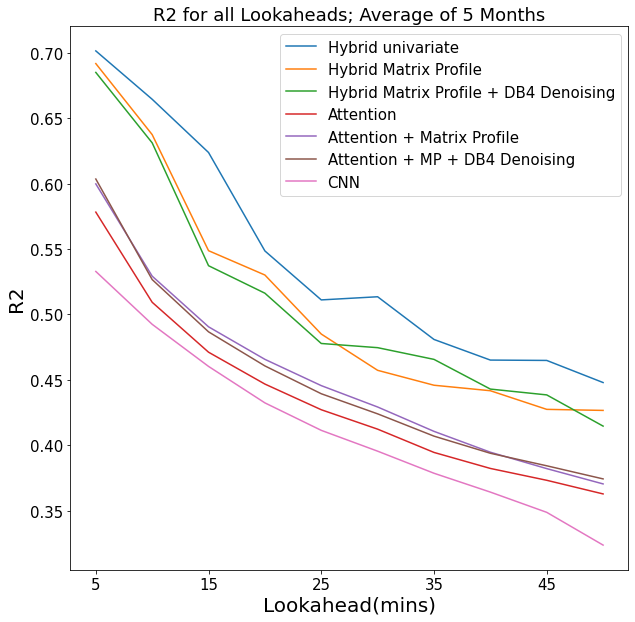

In [114]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})
plt.plot(pd.DataFrame(hybrid_lookaheads_metrics)['R2'], label='Hybrid univariate')
plt.plot(pd.DataFrame(hybrid_mp_lookaheads_metrics)['R2'], label='Hybrid Matrix Profile')
plt.plot(pd.DataFrame(hybrid_mp_wav_lookaheads_metrics)['R2'], label='Hybrid Matrix Profile + DB4 Denoising')



plt.plot(months_averaged_10['R2'], label='Attention')
plt.plot(months_averaged_mp10['R2'], label='Attention + Matrix Profile')
plt.plot(months_averaged_wav['R2'], label='Attention + MP + DB4 Denoising')
#plt.plot(months_averaged_wav2['R2'], label='Attention + MP + Bior3.3 Denoising')

plt.plot(months_averagedcnn['R2'], label='CNN')
#plt.plot(months_averaged_cnn_mp['R2'], label='CNN Matrix Profile')
plt.title('R2 for all Lookaheads; Average of 5 Months')
plt.xlabel('Lookahead(mins)', size=20)
plt.ylabel('R2', size=20)
plt.xticks(ticks=ticks, labels=labels)
plt.legend()



plt.show()


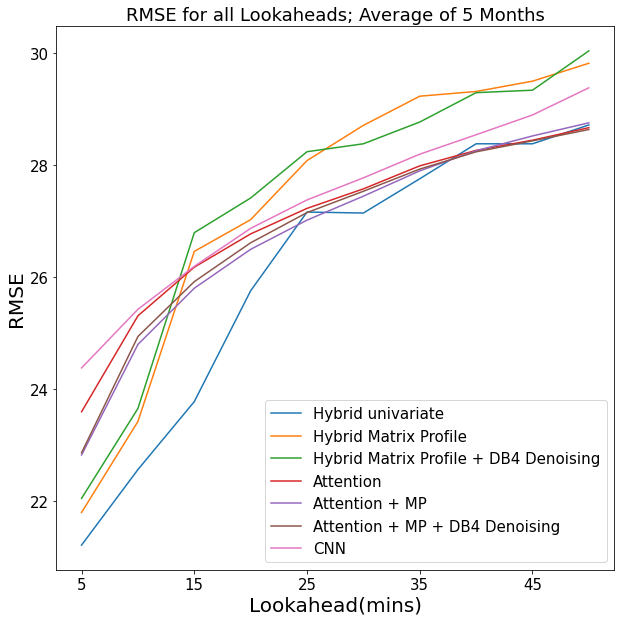

In [115]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})
plt.plot(pd.DataFrame(hybrid_lookaheads_metrics)['RMSE'], label='Hybrid univariate')
plt.plot(pd.DataFrame(hybrid_mp_lookaheads_metrics)['RMSE'], label='Hybrid Matrix Profile')
plt.plot(pd.DataFrame(hybrid_mp_wav_lookaheads_metrics)['RMSE'], label='Hybrid Matrix Profile + DB4 Denoising')
plt.plot(months_averaged_10['RMSE'], label='Attention')
plt.plot(months_averaged_mp10['RMSE'], label='Attention + MP')
plt.plot(months_averaged_wav['RMSE'], label='Attention + MP + DB4 Denoising')
#plt.plot(months_averaged_wav2['RMSE'], label='Attention + MP + Bior3.3 Denoising')

plt.plot(months_averagedcnn['RMSE'], label='CNN')
#plt.plot(months_averaged_cnn_mp['RMSE'], label='CNN Matrix Profile')

plt.xlabel('Lookahead', size=20)
plt.ylabel('RMSE', size=20)
plt.legend()
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('Lookahead(mins)', size=20)
plt.title('RMSE for all Lookaheads; Average of 5 Months')

plt.show()



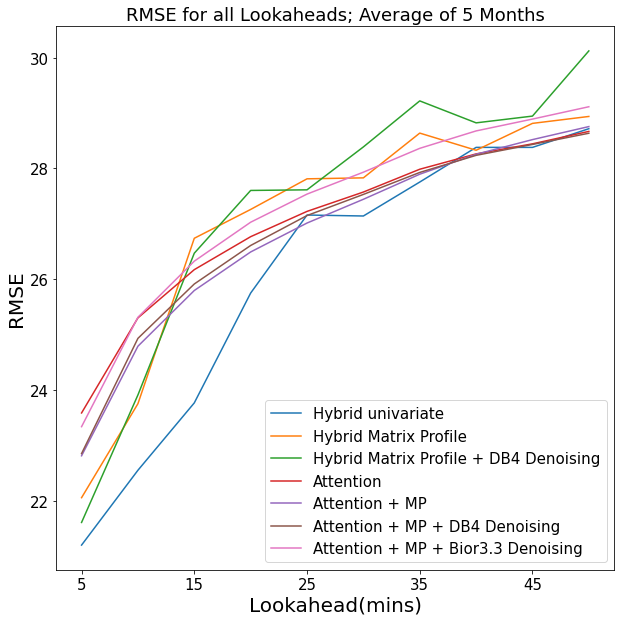

In [71]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})
plt.plot(pd.DataFrame(hybrid_lookaheads_metrics)['RMSE'], label='Hybrid univariate')
plt.plot(pd.DataFrame(hybrid_mp_fwd_lookaheads_metrics)['RMSE'], label='Hybrid Matrix Profile')
plt.plot(pd.DataFrame(hybrid_mp_fwd_wav_lookaheads_metrics)['RMSE'], label='Hybrid Matrix Profile + DB4 Denoising')
plt.plot(months_averaged_10['RMSE'], label='Attention')
plt.plot(months_averaged_mp10['RMSE'], label='Attention + MP')
plt.plot(months_averaged_wav['RMSE'], label='Attention + MP + DB4 Denoising')
plt.plot(months_averaged_wav2['RMSE'], label='Attention + MP + Bior3.3 Denoising')
plt.xlabel('Lookahead', size=20)
plt.ylabel('RMSE', size=20)
plt.legend()
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('Lookahead(mins)', size=20)
plt.title('RMSE for all Lookaheads; Average of 5 Months')

plt.show()

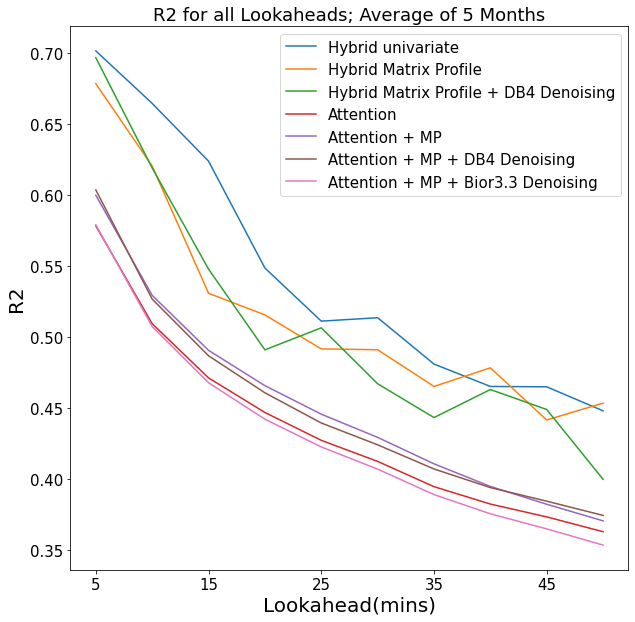

In [73]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})
plt.plot(pd.DataFrame(hybrid_lookaheads_metrics)['R2'], label='Hybrid univariate')
plt.plot(pd.DataFrame(hybrid_mp_fwd_lookaheads_metrics)['R2'], label='Hybrid Matrix Profile')
plt.plot(pd.DataFrame(hybrid_mp_fwd_wav_lookaheads_metrics)['R2'], label='Hybrid Matrix Profile + DB4 Denoising')
plt.plot(months_averaged_10['R2'], label='Attention')
plt.plot(months_averaged_mp10['R2'], label='Attention + MPfwd')
plt.plot(months_averaged_wav['R2'], label='Attention + MPfwd + DB4 Denoising')
plt.plot(months_averaged_wav2['R2'], label='Attention + MPfwd + Bior3.3 Denoising')
plt.title('R2 for all Lookaheads; Average of 5 Months')
plt.xlabel('Lookahead(mins)', size=20)
plt.ylabel('R2', size=20)
plt.xticks(ticks=ticks, labels=labels)
plt.legend()



plt.show()